In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('covid-data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Analizamos los valores posibles de DATE_DIED

In [4]:
df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

Si DATE_DIED es '9999-99-99' el paciente no ha fallecido

In [5]:
df['IS_DEAD'] = df.DATE_DIED.apply(lambda x: 0 if x == '9999-99-99' else 1)
df.IS_DEAD.value_counts()

0    971633
1     76942
Name: IS_DEAD, dtype: int64

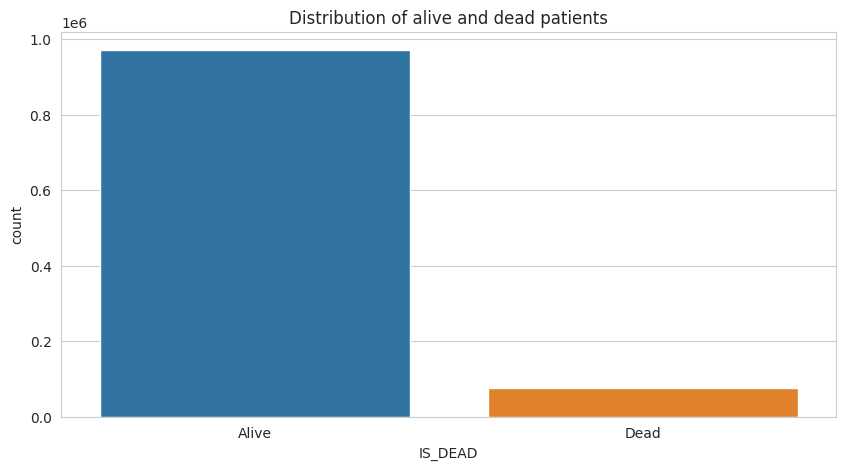

In [6]:
dead = df.groupby('IS_DEAD').size().reset_index(name='count')
plt.figure(figsize=(10, 5))
sns.barplot(x='IS_DEAD', y='count', data=dead)
plt.title('Distribution of alive and dead patients')
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.show()


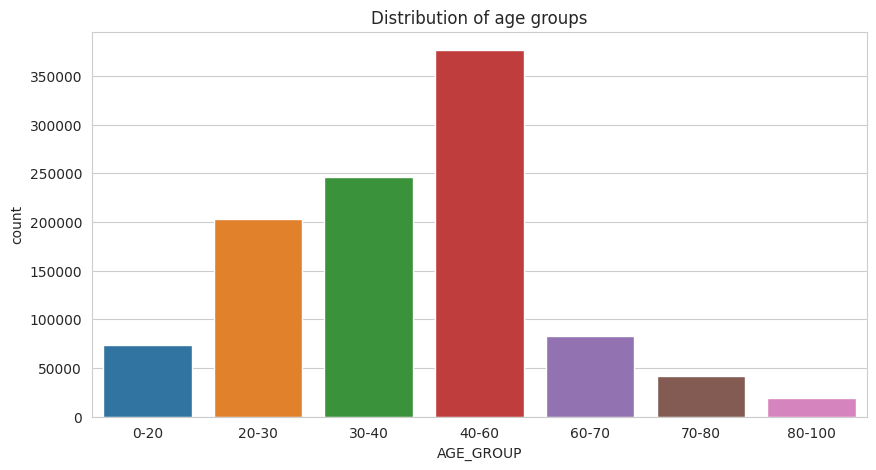

In [7]:
df['AGE_GROUP'] = pd.cut(df.AGE, bins=[0, 20, 30, 40 ,60 ,70, 80, 100],
                            labels=['0-20', '20-30', '30-40', '40-60', '60-70',
                                    '70-80', '80-100'])
plt.figure(figsize=(10, 5))
sns.countplot(x='AGE_GROUP', data=df)
plt.title('Distribution of age groups')
plt.show()

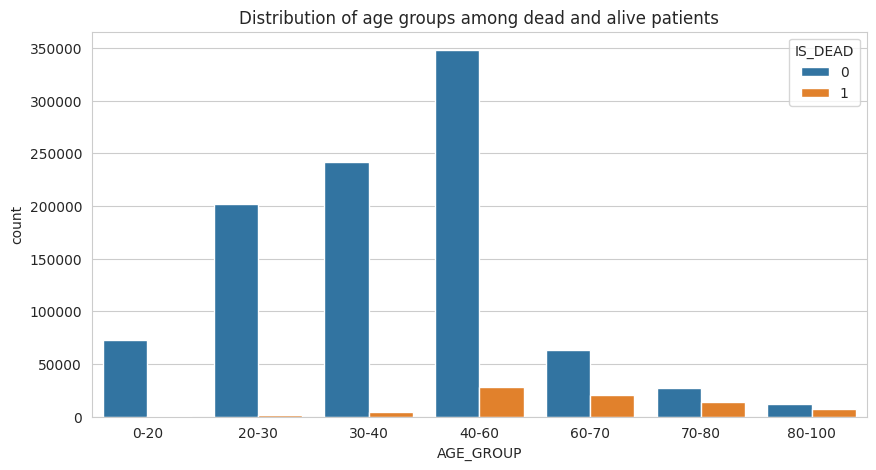

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='AGE_GROUP', hue='IS_DEAD', data=df)
plt.title('Distribution of age groups among dead and alive patients')
plt.show()


A partir de los 40 años el riesgo de muerte aumenta

In [9]:
df=df.drop(['AGE_GROUP'],axis=1)
for col in df.columns:
    if col not in ['DATE_DIED', 'IS_DEAD', 'AGE']:
        df[col] = df[col].apply(lambda x: 1 if x == 1 else 0)


df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,IS_DEAD
0,0,1,1,1,03/05/2020,0,1,65,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,1,03/06/2020,0,1,72,0,0,0,0,0,1,0,0,1,1,0,0,0,1
2,0,1,0,0,09/06/2020,1,0,55,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,12/06/2020,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,21/06/2020,0,0,68,0,1,0,0,0,1,0,0,0,0,0,0,0,1


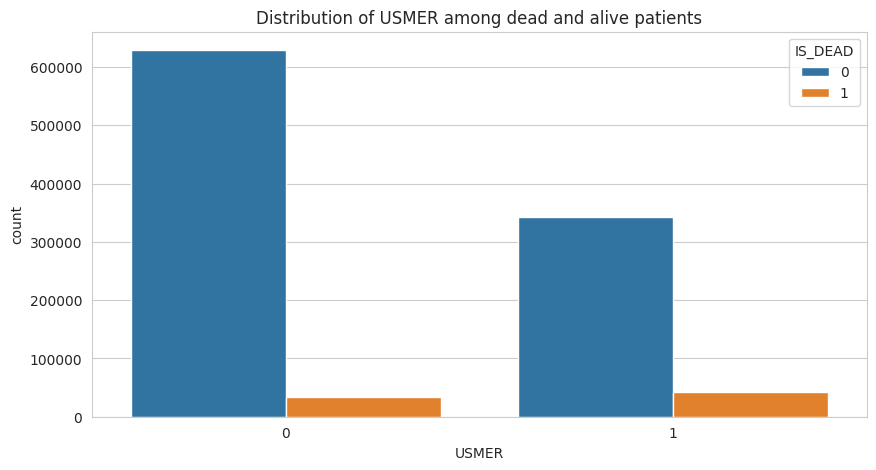

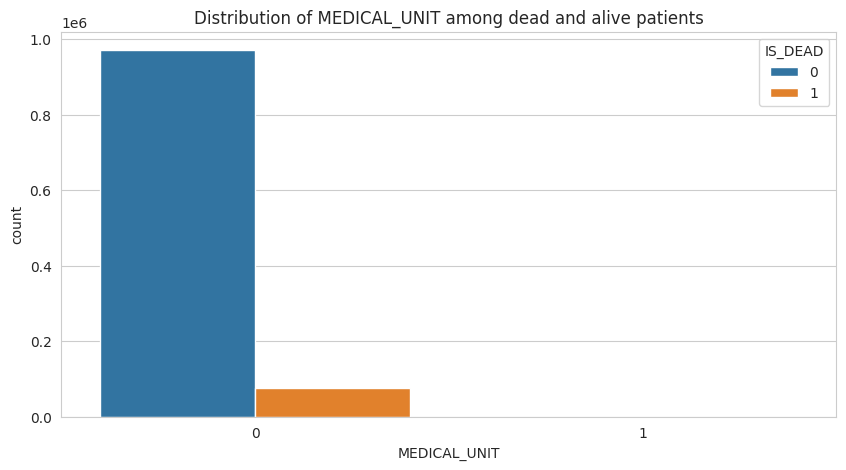

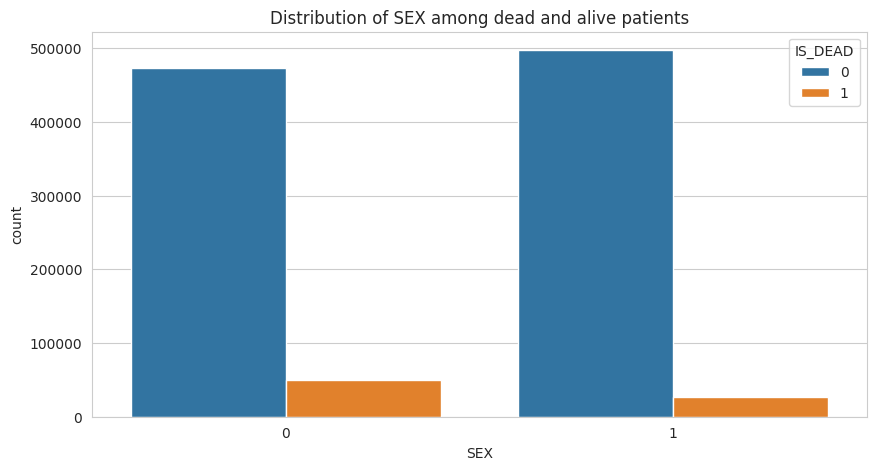

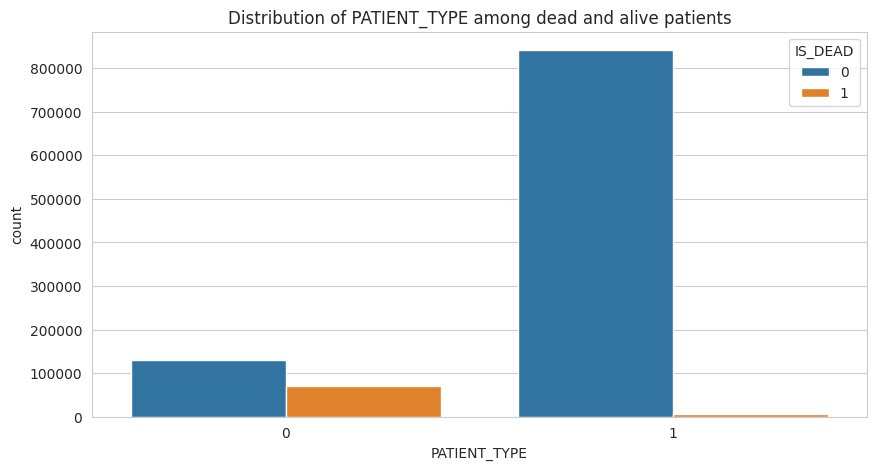

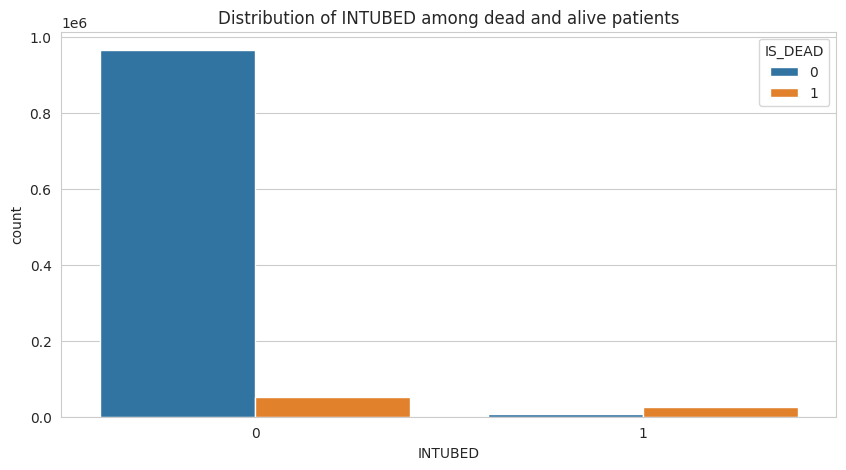

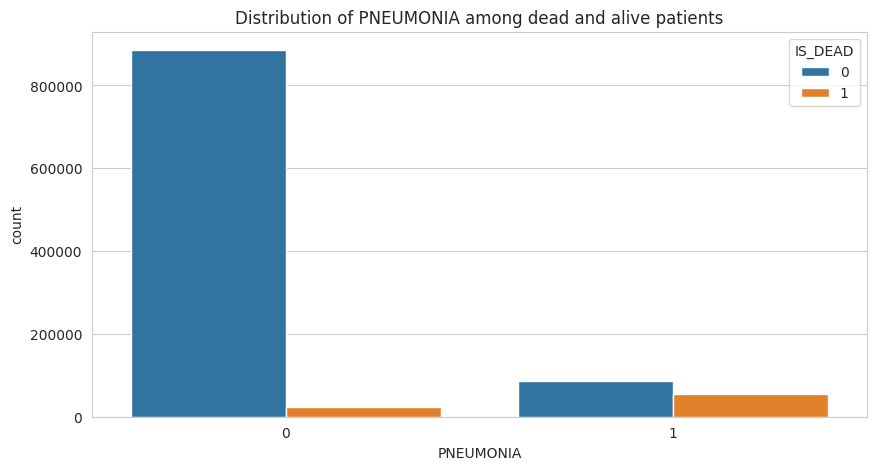

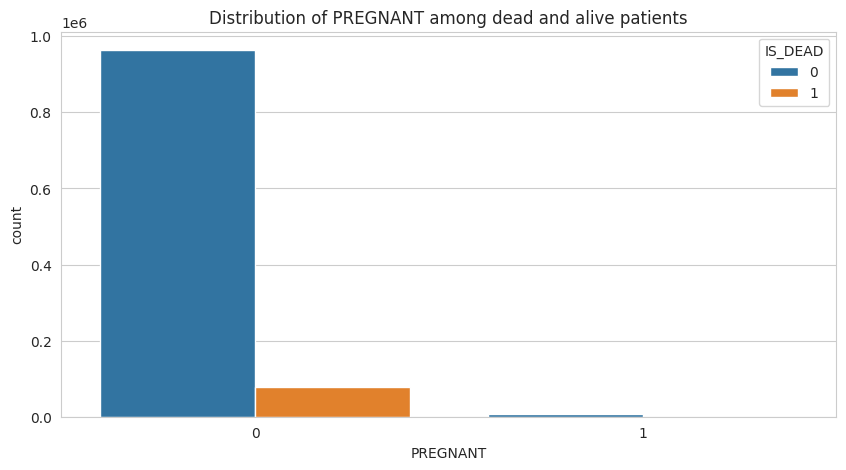

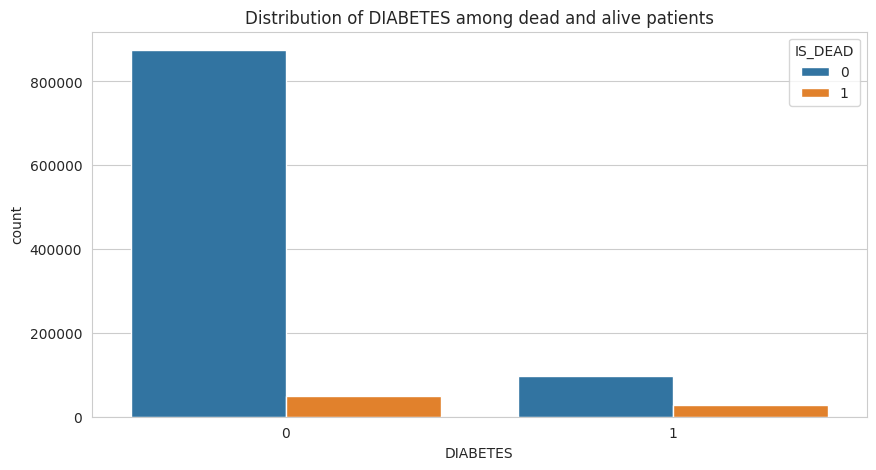

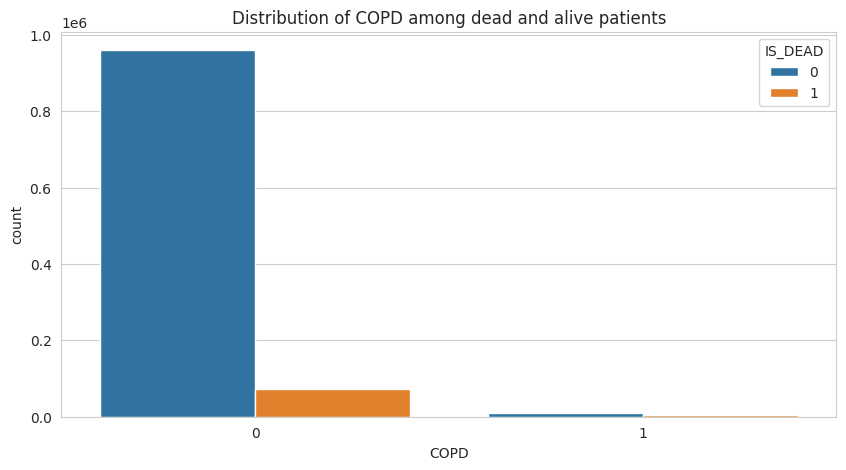

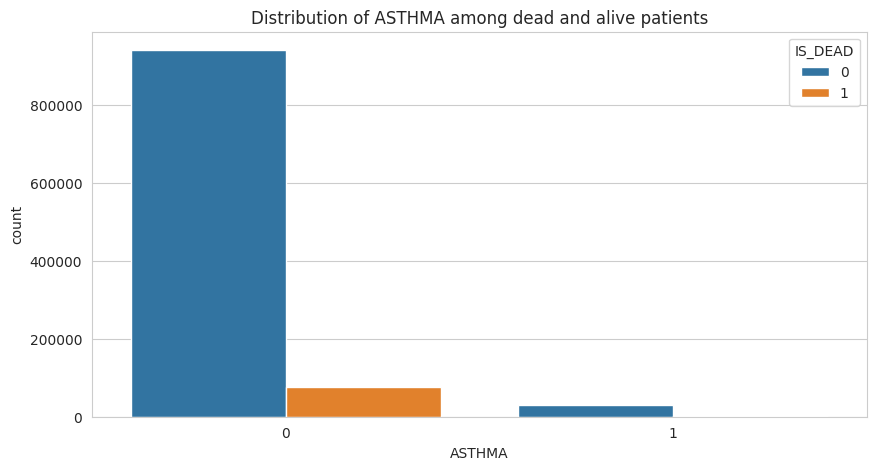

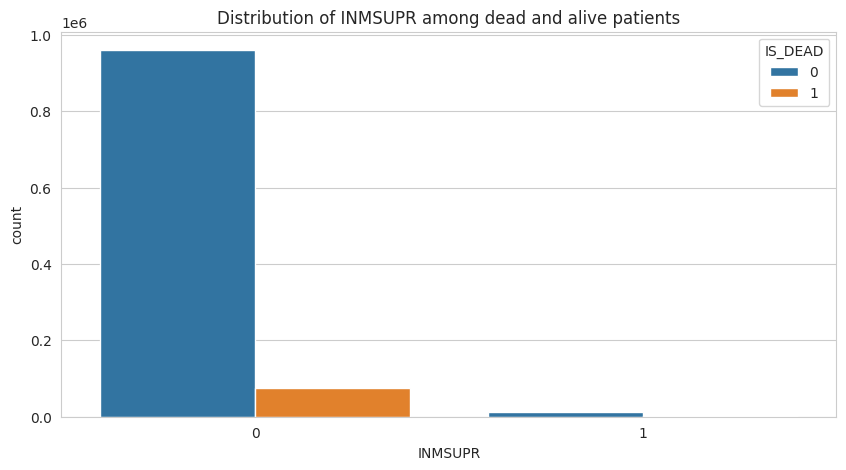

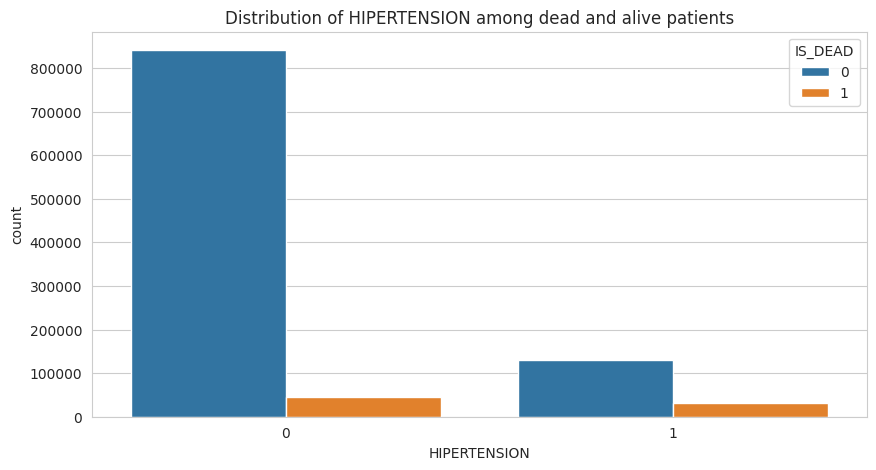

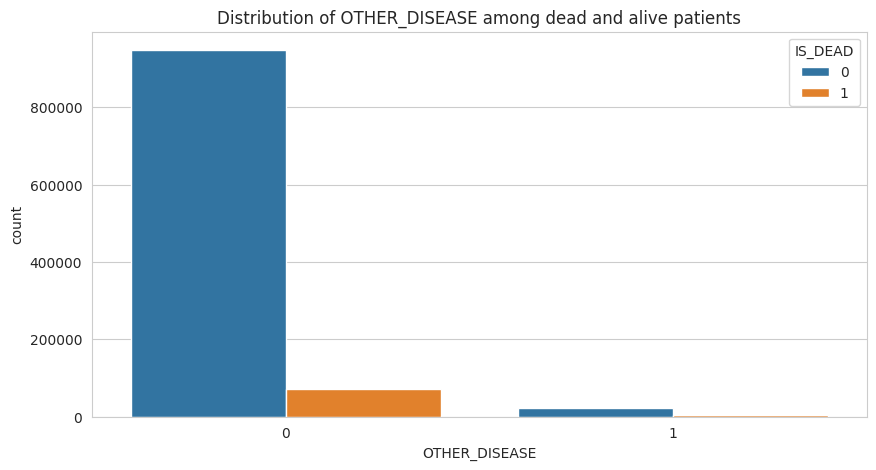

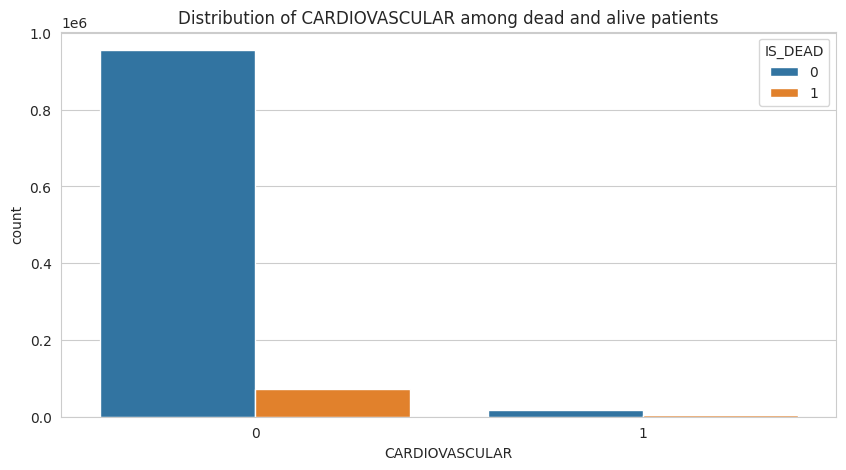

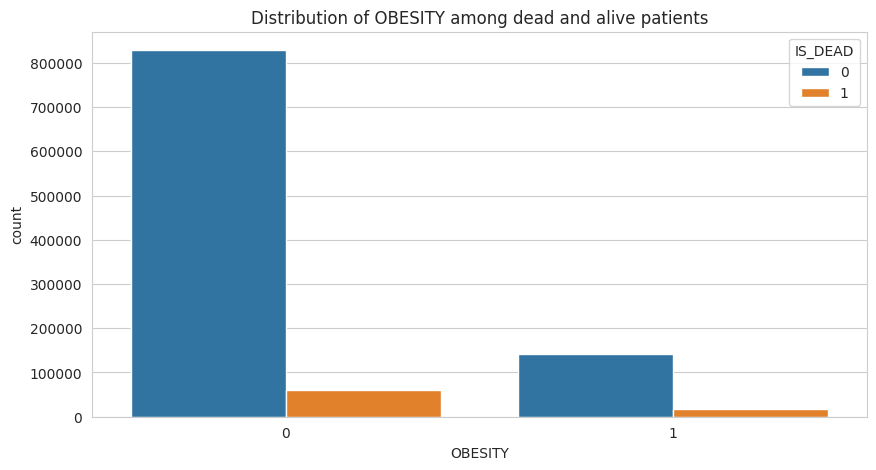

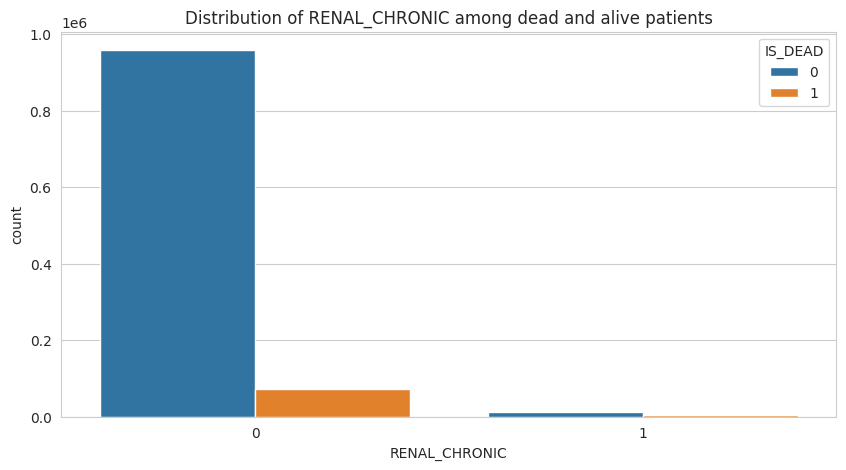

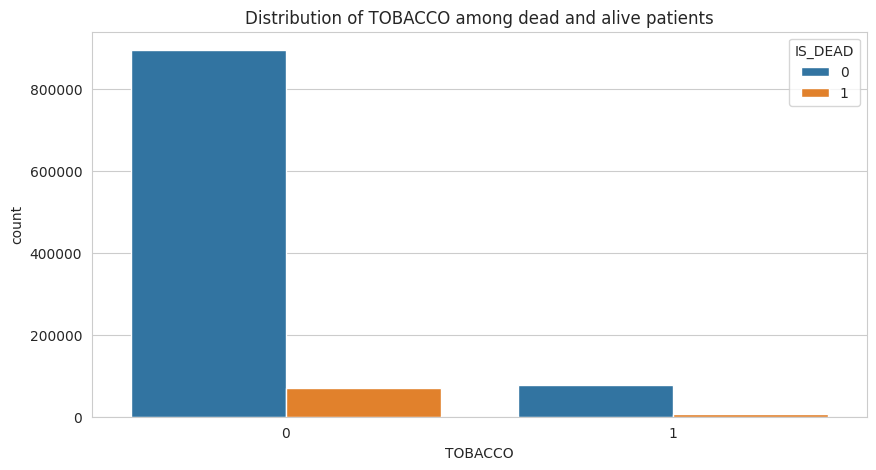

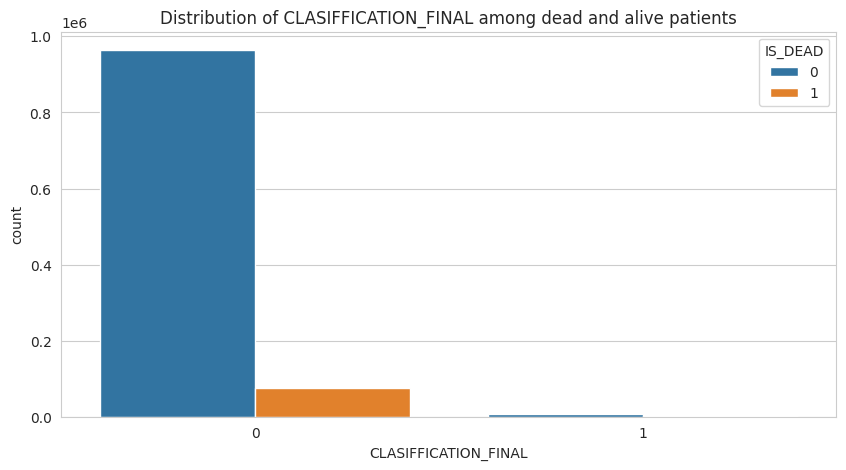

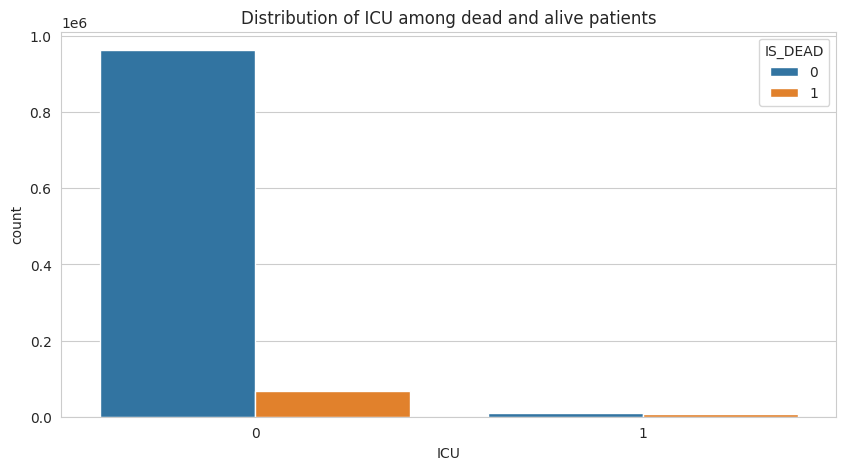

In [10]:
for col in df.columns:
    if col not in ['DATE_DIED', 'IS_DEAD', 'AGE']:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='IS_DEAD', data=df)
        plt.title('Distribution of {} among dead and alive patients'.format(col))
        plt.show()


/tmp/ipykernel_81236/450461126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

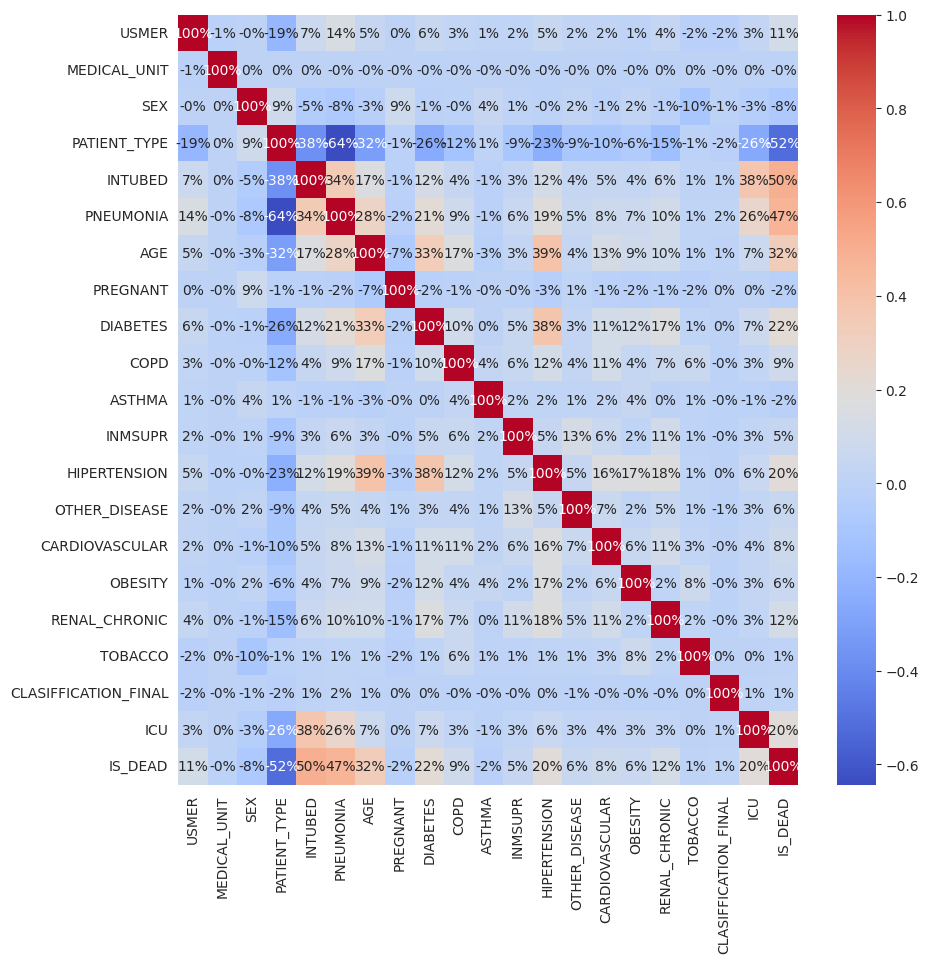

In [11]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.0%')


/tmp/ipykernel_81236/1341019719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

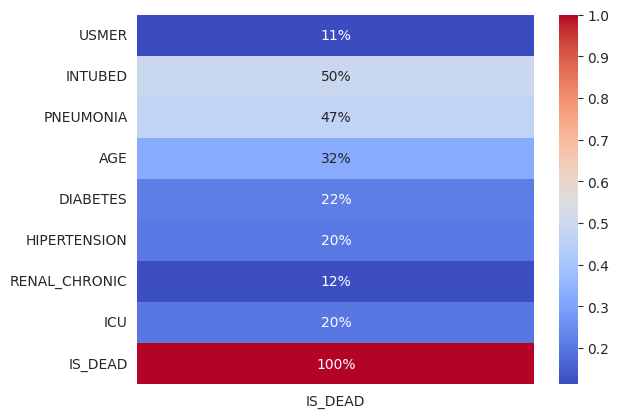

In [12]:
corr = df.corr()
corr = corr[corr.IS_DEAD > 0.1]
corr = corr[['IS_DEAD']]
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.0%')


Los datos con mayor correlación con el riesgo de muerte.

In [13]:
df=df.drop(['DATE_DIED'],axis=1)
df['IS_DEAD']=df['IS_DEAD'].replace(0,'alive')
df['IS_DEAD']=df['IS_DEAD'].replace(1,'dead')

In [14]:
predictors=df.drop(['IS_DEAD'],axis=1)
target=df[['IS_DEAD']]
target

,IS_DEAD
0,dead
1,dead
2,dead
3,dead
4,dead
...,...
1048570,alive
1048571,alive
1048572,alive
1048573,alive


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(predictors,target,
                                               test_size=0.2,
                                               random_state=42)

In [16]:
lr = LogisticRegression(C=1000, solver='lbfgs', multi_class='auto')
lr.fit(x_train,y_train)

/home/winvi/workspace/python/python-eoi-miniprojects/data-science/covid19/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/winvi/workspace/python/python-eoi-miniprojects/data-science/covid19/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000)

In [17]:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

In [18]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'IS_DEAD'],
      dtype='object')

In [19]:
df_comprobation = pd.DataFrame({'USMER':x_test['USMER'].values,
                                'MEDICAL_UNIT':x_test['MEDICAL_UNIT'].values,
                                'SEX':x_test['SEX'].values,
                                'PATIENT_TYPE':x_test['PATIENT_TYPE'].values,
                                'INTUBED':x_test['INTUBED'].values,
                                'PNEUMONIA':x_test['PNEUMONIA'].values,
                                'AGE':x_test['AGE'].values,
                                'PREGNANT':x_test['PREGNANT'].values,
                                'DIABETES':x_test['DIABETES'].values,
                                'COPD':x_test['COPD'].values,
                                'ASTHMA':x_test['ASTHMA'].values,
                                'INMSUPR':x_test['INMSUPR'].values,
                                'HIPERTENSION':x_test['HIPERTENSION'].values,
                                'OTHER_DISEASE':x_test['OTHER_DISEASE'].values,
                                'CARDIOVASCULAR':x_test['CARDIOVASCULAR'].values,
                                'OBESITY':x_test['OBESITY'].values,
                                'RENAL_CHRONIC':x_test['RENAL_CHRONIC'].values,
                                'TOBACCO':x_test['TOBACCO'].values,
                                'CLASIFFICATION_FINAL':x_test['CLASIFFICATION_FINAL'].values,
                                'ICU':x_test['ICU'].values,
                                'v_real':y_test['IS_DEAD'].values,
                                'pred':lr_test_pred})

In [20]:
df_comprobation

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,v_real,pred
0,0,0,1,1,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
1,0,0,0,1,0,0,28,0,0,0,0,0,1,0,0,0,0,0,0,0,alive,alive
2,0,0,1,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
3,0,0,1,1,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,alive,alive
4,0,0,1,1,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209710,0,0,0,1,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
209711,1,0,1,1,0,0,70,0,0,0,0,0,1,0,0,0,0,0,0,0,alive,alive
209712,0,0,1,1,0,0,34,0,0,0,0,0,0,0,0,0,0,1,0,0,alive,alive
209713,0,0,1,1,0,0,57,0,1,0,0,0,1,0,0,1,0,0,0,0,alive,alive


In [21]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
df_comprobation


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,v_real,pred
0,0,0,1,1,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
1,0,0,0,1,0,0,28,0,0,0,0,0,1,0,0,0,0,0,0,0,alive,alive
2,0,0,1,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
3,0,0,1,1,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,alive,alive
4,0,0,1,1,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209710,0,0,0,1,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive
209711,1,0,1,1,0,0,70,0,0,0,0,0,1,0,0,0,0,0,0,0,alive,alive
209712,0,0,1,1,0,0,34,0,0,0,0,0,0,0,0,0,0,1,0,0,alive,alive
209713,0,0,1,1,0,0,57,0,1,0,0,0,1,0,0,1,0,0,0,0,alive,alive


In [22]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,lr_test_pred)
acc

0.9455594497293947

In [24]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter('ignore')
lr_cv = cross_val_score(lr, x_train,
                        y_train,
                        scoring='f1_macro',
                        cv = 5)

In [25]:
lr_cv

array([0.76274853, 0.76449669, 0.76267875, 0.76397854, 0.76371782])

In [26]:
lr_cv.mean()

0.7635240670587862

In [27]:
def comprobation(vr, p):
    return 1 if vr == p else 0

In [28]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)

In [29]:
df_comprobation['Success'] = df_comprobation.apply(lambda x: comprobation(x['v_real'], x['pred']), axis=1)
df_comprobation

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,v_real,pred,Success
0,0,0,1,1,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive,1
1,0,0,0,1,0,0,28,0,0,0,0,0,1,0,0,0,0,0,0,0,alive,alive,1
2,0,0,1,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive,1
3,0,0,1,1,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,alive,alive,1
4,0,0,1,1,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209710,0,0,0,1,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,alive,alive,1
209711,1,0,1,1,0,0,70,0,0,0,0,0,1,0,0,0,0,0,0,0,alive,alive,1
209712,0,0,1,1,0,0,34,0,0,0,0,0,0,0,0,0,0,1,0,0,alive,alive,1
209713,0,0,1,1,0,0,57,0,1,0,0,0,1,0,0,1,0,0,0,0,alive,alive,1


In [32]:
real_values = []
for v in predictors.columns:
    c = float(input('Introduce el valor de: {}: '.format(v)))
    real_values.append(c)

Introduce el valor de: USMER: 0
Introduce el valor de: MEDICAL_UNIT: 1
Introduce el valor de: SEX: 0
Introduce el valor de: PATIENT_TYPE: 1
Introduce el valor de: INTUBED: 0
Introduce el valor de: PNEUMONIA: 1
Introduce el valor de: AGE: 35
Introduce el valor de: PREGNANT: 0
Introduce el valor de: DIABETES: 0
Introduce el valor de: COPD: 0
Introduce el valor de: ASTHMA: 0
Introduce el valor de: INMSUPR: 0
Introduce el valor de: HIPERTENSION: 1
Introduce el valor de: OTHER_DISEASE: 0
Introduce el valor de: CARDIOVASCULAR: 0
Introduce el valor de: OBESITY: 0
Introduce el valor de: RENAL_CHRONIC: 0
Introduce el valor de: TOBACCO: 0
Introduce el valor de: CLASIFFICATION_FINAL: 0
Introduce el valor de: ICU: 0

In [33]:
df_prediction = pd.DataFrame(real_values)
df_prediction = df_prediction.T
df_prediction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_prediction.columns = predictors.columns
df_prediction

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,0.0,1.0,0.0,1.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
new_predictors = predictors.append(df_prediction)
new_predictors = new_predictors.reset_index()
new_predictors =  new_predictors.drop('index', axis=1)
new_predictors

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,0.0,1.0,1.0,1.0,0.0,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048571,1.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048572,0.0,0.0,0.0,1.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048573,0.0,0.0,0.0,1.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048574,0.0,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
prediction = lr.predict(new_predictors)
prediction[[len(prediction)-1]]

array(['alive'], dtype=object)